# Project 2D: Final Jupyter Notebook

### Scientific Question: How structurally similar are the BRCA1 proteins in mammals such as mice to the BRCA1 proteins found in humans?  

The BRCA1 gene is known for supressing tumors and for being involved in DNA repair. The BRCA1 gene provides instructions for making the protein that will subsequently act as a tumor suppressor. (https://medlineplus.gov/genetics/gene/brca1/)These proteins help prevent cells from growing uncontrollably as well as interacting wtih other proteins to fix breaks in DNA. 

BRCA1 has also been associated with breast cancer suscepibility within germline mutations. When mutations occur within BRCA1 genes, they have been linked to genomic instability and increased risk of cancer. (Gorodetska, Ielizaveta et al). Information on the BRCA1 gene can be found on the NCBI website, including gene sequences for humans, rats, chimps, mice, and other animals that are known to have the BRCA1 gene. (https://www.ncbi.nlm.nih.gov/gene/84250) The 3D structure of the sequence can also been found on protein databases such as the RCSB PDB.

### Scientific Hypothesis: If BRCA1 proteins found in humans and mice are structurally similar, then they will have a similar alignment as well as similar 3D structures. 

We will be taking the gene sequence of localization domain of the BRCA1 gene found in humans and found in mice. This information can be found on the NCBI website. It was saved as a fasta file and read into the pairwise sequence alignment. The results of the pairwise sequence are shown using sequence logos. When a sequence has the same alignment, the letter for the gene is shown larger than the ones with different alignments. 

We will also be looking at the 3D crystal structure of the BRCA gene in humans and mice to see if there is a similarity or difference between the two that may explain why humans have a higher rate of breast cancer compared to other mammals that also have the BRCA1 gene. As well as the comparisons, we also looked at the 3D measurement distances of the structures. The comparison of the two structures as well as the measurement analysis, is done and shown in this notebook.

# Load Packages: 

Biopython:

Biopython is a module that allows us to deal with biological data in python. It has classes that represent biological seqeunces and sequence annotations. It is also able to read and write different types of file formats. It is great for biological information because it allows access for online databases such as NCBI through programming. Within Biopython, there are separate modules that extend biopythons capabilities such as sequence alignment, protein structure, population genetics, phylogenetics, sequence motifs, and machine learning. (http://bipython.org/)

Logomaker:

Logomaker is a python package that generates publication sequence logos. This package can make standard and high customized logos that can show the properties of DNA, RNA, or protein sequences. It creates logos that are rendered as vector graphos embedded withitn matplotlib axes objects. (https://logomaker.readthedocs.io/en/latest/)

NglView: 

Nglview is an interactive widget that allows us to see molecular structures and trajectories. (https://anaconda.org/conda-forge/nglview)

Numpy

 


In [ ]:
# all packages can be downloaded with pip install or through conda

# pip install Biopython Logomaker Nglview Numpy

### Part 2A: Load in the data from NCBI and perform Pairwise Alignment

Pairwise sequence alignment is the process in which two sequenes are compared and a possible best sequence alignment is made. 

Below is code that runs a pairwise alignment between the human BRCA1 gene sequence and the Mouse BRCA1 sequence. It specifically aligns the gene for the part of the functional domain that is the localization domain. After alignment is completed, you can print the alignment of the two sequences as a code check. 

In [30]:
# Code modified from Geeks for Geeks Pairwise alignment 
# Import libraries
from Bio import Align, SeqIO
from Bio.Seq import Seq

# Create function that returns a Sequence
def getSeq(filePath):
    # local variable
    # call method SeqIO.parse to read in the fasta file of input gene sequence and it takes in the path to the file
    # and the type of file it returns a seqrec iterator
    sequence_record = list(SeqIO.parse(filePath, "fasta"))[0]
    return sequence_record.seq
    
  
# Get Human Seq
# global variable
# call our getSeq method with our human gene data set to get a sequence
Human_seq = getSeq("SLF1_datasets/ncbi_dataset/data/SLF1_Human_gene.fna")

# Get Chimp-arooni Seq
# global variable
# call our getSeq method with our human gene data set to get a sequence
Mouse_seq = getSeq("Slf1_datasets_mouse/ncbi_dataset/data/Mouse_gene.fna")


# # Make the lengths match
# # Assume the human sequence is shorter than the chimp-arooni sequence
# min_length = len(human_seq)
# if len(human_seq) > len(chimp_seq):
#     min_length = len(chimp_seq)
    
# print(f"Length of human seq: {len(human_seq)}\nLength of chimp-arooni seq: {len(chimp_seq)}")
# human_seq = human_seq[0:min_length]
# chimp_seq = chimp_seq[0:min_length]

  
# Calling method
# prepare pairwise aligner object and save it to a global variable called aligner
aligner = Align.PairwiseAligner()
  
# Showing method attributes
print(aligner)
  
# Finding similarities
# use aligner and call method called align that passes in both of the sequences (human and chimp) and returns
# a list of alignments 
alignments = aligner.align(Human_seq, mouse_seq)
  
# Showing results
# small for loop that prints each alignment in alignments
# code check
# print first alignment as check
print(alignments[0])
# for alignment in alignments:
#     print(alignment)

Pairwise sequence aligner with parameters
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

ACAC-GGTGT---CTTCGGCCT-CGCCCAGGGACACTTGGTGACCCGAG-GTCGAGTTCCAAGT-CGGAGACAGATT-TTG-CGAG-TGGATAAGACGGTAAGCCGGGATCCCAGGGCCTTCTCCAGCTGCACTGGGTGTCAAGCGCCACGGGGTTTGATGGGGACTCCTT-C--TGGT--TCCACCC-TCGCCCACTCACTTCTCGGGCTGGCCATAATGCTGCACAGAGCCCCGGCCAGCCATTAATATCAGGCGCAGGAGAAAACCCAGTAAAATCACTTACCAGTCTTCCACCTCCGGTGCTGATCTAGCAAGAGCCTGA-CCCGCTGGCCAGACTCAAGCTCTGCACCAGGTATTACCA-C-CCTGGCGACGGCTCCGGA-GCGTCACTGAC

In [15]:
# Code modified from Geeks for Geeks Pairwise alignment 
# (https://www.geeksforgeeks.org/biopython-pairwise-alignment/)

# Import libraries
from Bio import Align, SeqIO
from Bio.Seq import Seq

# Create function that returns a Sequence 
# (this is one that is only 50 nucleotides long becauase the full length sequence was too large for my computer)
def getSeq(filePath, length=50):
    # local variable
    # call method SeqIO.parse to read in the fasta file of input gene sequence and it takes in the path to the file
    # and the type of file it returns a seqrec iterator
    sequence_record = list(SeqIO.parse(filePath, "fasta"))[0]
    return sequence_record.seq[0:length]

# Create function that returns a Sequence
# Full sequences run that is too large for my computer but works. 
# def getSeq(filePath):
    # local variable
    # call method SeqIO.parse to read in the fasta file of input gene sequence and it takes in the path to the file
    # and the type of file it returns a seqrec iterator
    #sequence_record = list(SeqIO.parse(filePath, "fasta"))[0]
    #return sequence_record.seq[0]
    
  
 # Get human seq of the localization sequence  
 # global variable
 # call our getSeq method with our human gene data set to get a sequence
human_seq = getSeq("SLF1_datasets/ncbi_dataset/data/SLF1_Human_gene.fna")

# Get mouse Seq of the localization sequence 
# global variable
# call our getSeq method with our human gene data set to get a sequence
mouse_seq = getSeq("Slf1_datasets_mouse/ncbi_dataset/data/Mouse_gene.fna")

  
# Calling method
# prepare pairwise aligner object and save it to a global variable called aligner
aligner = Align.PairwiseAligner()
  
# Showing method attributes
#code check with print statement 
    #print(aligner)
  

    
# Finding similarities
    # use aligner and call method called align that passes in both of the sequences (human and chimp) and returns
    # a list of alignments 
alignments = aligner.align(human_seq, mouse_seq)
  
# Showing results
    # code check with print statement 
    # small for loop that prints each alignment in alignments
    #for alignment in alignments:
        #print(alignment)


### Part 2B: Load in Data from PDB and perform Structural Bioinformatics analysis as well as measurement. 

Structural bioinformatics allows us to relate the anlaysis and prediction of the three dimentional structures of biological molecules such as proteins, DNA, and RNA. Below is code that uses nglview to show the structure of BRCA1 crystal structure of humans and the crystal struture of mice BRCA1 downloaded from an online public protein database (pdb).

In [22]:
# code modified from Iyer Structural bioinformatics video found on piazza

# import nglview package and bio.PDB
import nglview as nv
from Bio.PDB import *
parser = PDBParser()

#MOUSE BRCA1-A
# create global variable structure that uses parser.get_structure which takes in a file name and file of pdb 
# and returns a structure object 
structure = parser.get_structure("6GVW", "6GVW.pdb")

# create global variable BRCA1
BRCA1_Mouse = nv.show_biopython(structure)

# create global variables 
residues = structure.get_residues()
model = structure[0]
chain = model["A"]
residue = chain[100]
atom = residue["CA"]

res_list = Selection.unfold_entities(structure, "R")

GLU = chain[64]
ARG = chain[8]

# distance measurement global variables
HIS = chain[31]
ILE = chain[27]

ca1 = GLU["CA"]
ca2 = ARG["CA"]

distance = ca1 - ca2
print("Distance: " + str(distance))

#angle measurement global variables 
ARG = chain[14]
LYS = chain[16]
TYR = chain[18]

atom1 = ARG["CA"]
atom2 = LYS["CA"]
atom3 = TYR["CA"]

vector1 = atom1.get_vector()
vector2 = atom2.get_vector()
vector3 = atom3.get_vector()
angle = calc_angle(vector1, vector2, vector3)
print("Angle: " + str(angle))

# torsion angles global variables 
GLU = chain[11]
MET = chain[102]
ARG2 = chain[8]
LEU = chain[7]

atom4 = GLU["CA"]
atom5 = MET["CA"]
atom6 = ARG2["CA"]
atom7 = LEU["CA"]

vector1 = atom4.get_vector()
vector2 = atom5.get_vector()
vector3 = atom6.get_vector()
vector4 = atom7.get_vector()
Tangle = calc_dihedral(vector1, vector2, vector3, vector4)
print("torsion angle: " + str(Tangle))
BRCA1_Mouse

/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 80653.
  warnings.warn(
/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 80655.
  warnings.warn(
/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 80657.
  warnings.warn(
/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 80659.
  warnings.warn(


Distance: 14.343486
Angle: 1.2182613918117016
torsion angle: 2.5771063802260334


NGLWidget()

In [42]:
BRCA1_Mouse.render_image()

Image(value=b'', width='99%')

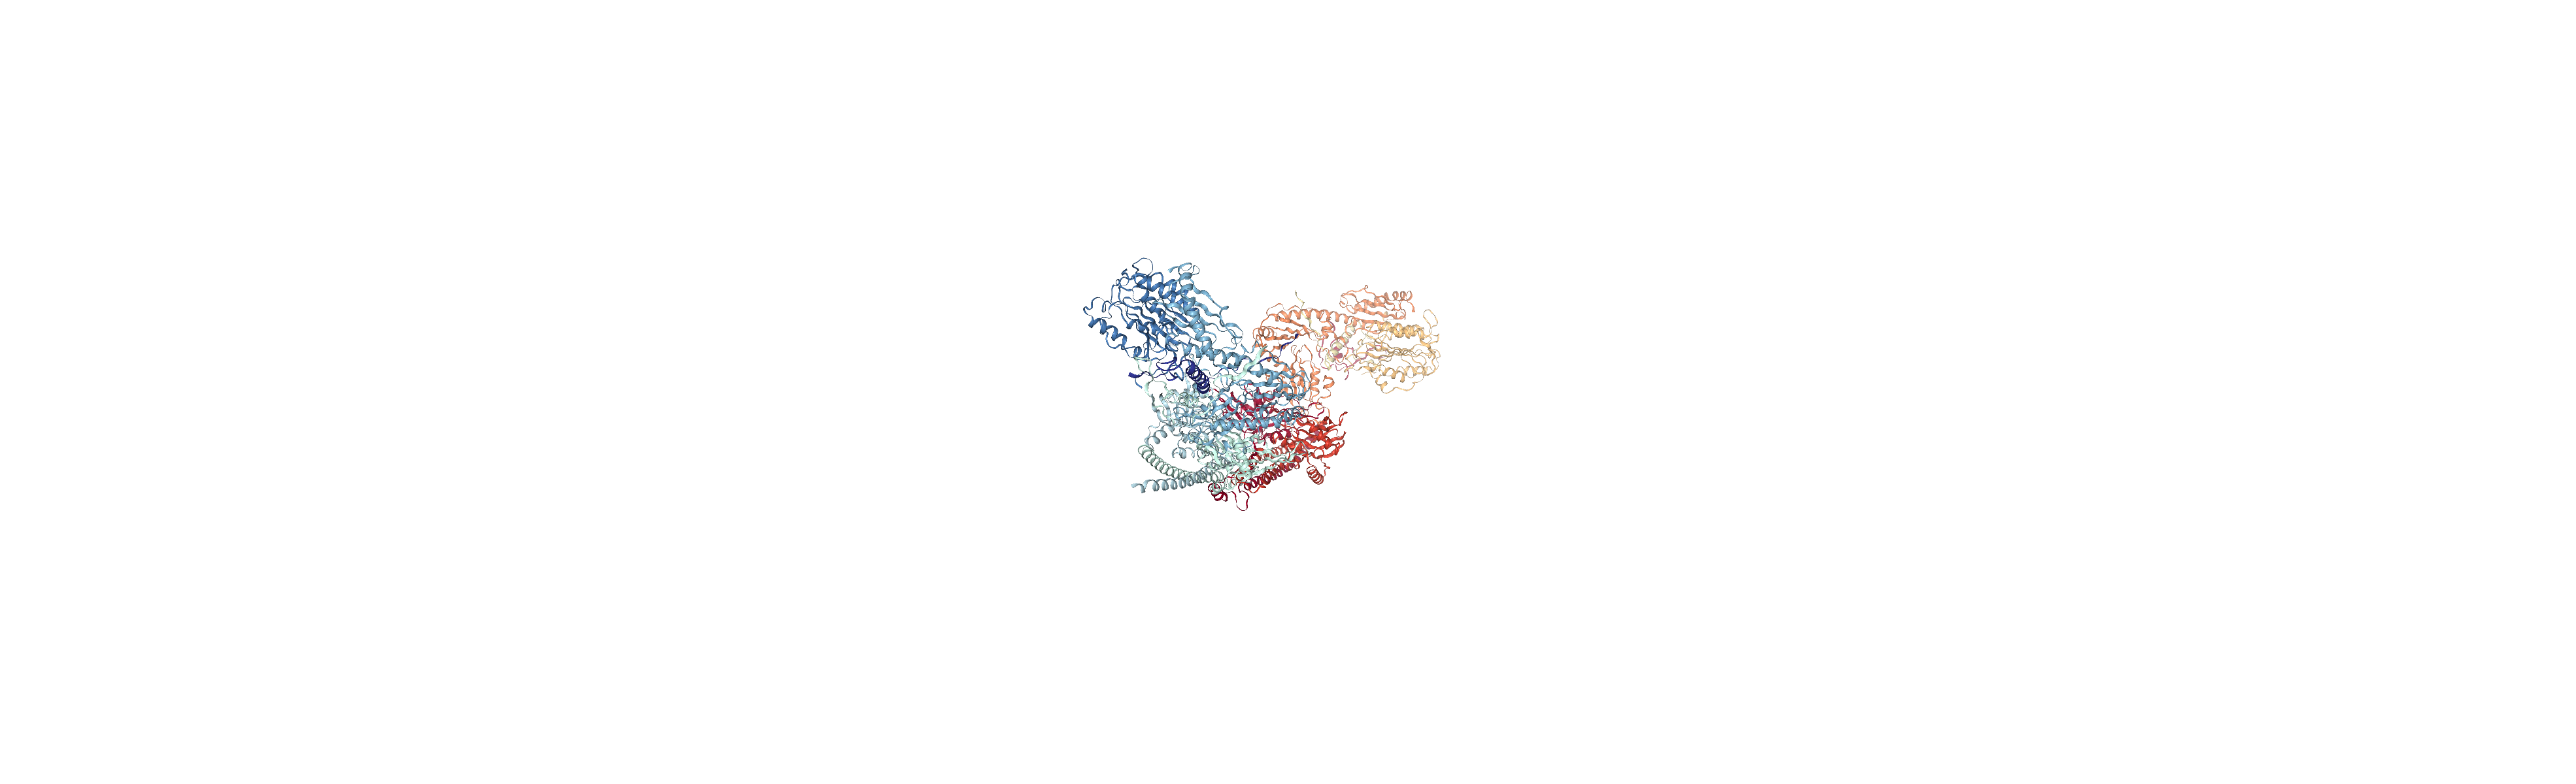

In [43]:
BRCA1_Mouse._display_image()

In [23]:
parser = PDBParser()

#MOUSE BRCA1-A
# create global variable structure that uses parser.get_structure which takes in a file name and file of pdb 
# and returns a structure object 
structure = parser.get_structure("6h3c", "6h3c.pdb")

# create global variable BRCA1
BRCA1_Human = nv.show_biopython(structure)

# create global variables 
residues = structure.get_residues()
model = structure[0]
chain = model["A"]
residue = chain[100]
atom = residue["CA"]

res_list = Selection.unfold_entities(structure, "R")

GLU = chain[64]
ARG = chain[8]

# distance measurement global variables
HIS = chain[31]
ILE = chain[27]

ca1 = GLU["CA"]
ca2 = ARG["CA"]

distance = ca1 - ca2
print("Distance: " + str(distance))

#angle measurement global variables 
ARG = chain[14]
LYS = chain[16]
TYR = chain[18]

atom1 = ARG["CA"]
atom2 = LYS["CA"]
atom3 = TYR["CA"]

vector1 = atom1.get_vector()
vector2 = atom2.get_vector()
vector3 = atom3.get_vector()
angle = calc_angle(vector1, vector2, vector3)
print("Angle: " + str(angle))

# torsion angles global variables 
GLU = chain[11]
MET = chain[102]
ARG2 = chain[8]
LEU = chain[7]

atom4 = GLU["CA"]
atom5 = MET["CA"]
atom6 = ARG2["CA"]
atom7 = LEU["CA"]

vector1 = atom4.get_vector()
vector2 = atom5.get_vector()
vector3 = atom6.get_vector()
vector4 = atom7.get_vector()
Tangle = calc_dihedral(vector1, vector2, vector3, vector4)
print("torsion angle: " + str(Tangle))
BRCA1_Human

/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 52112.
  warnings.warn(
/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 52113.
  warnings.warn(
/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 52114.
  warnings.warn(
/Users/indigocolumna/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 52117.
  warnings.warn(


Distance: 22.95172
Angle: 1.1625000655108257
torsion angle: 2.0195745636742033


NGLWidget()

In [24]:
BRCA1_Human.render_image()

Image(value=b'', width='99%')

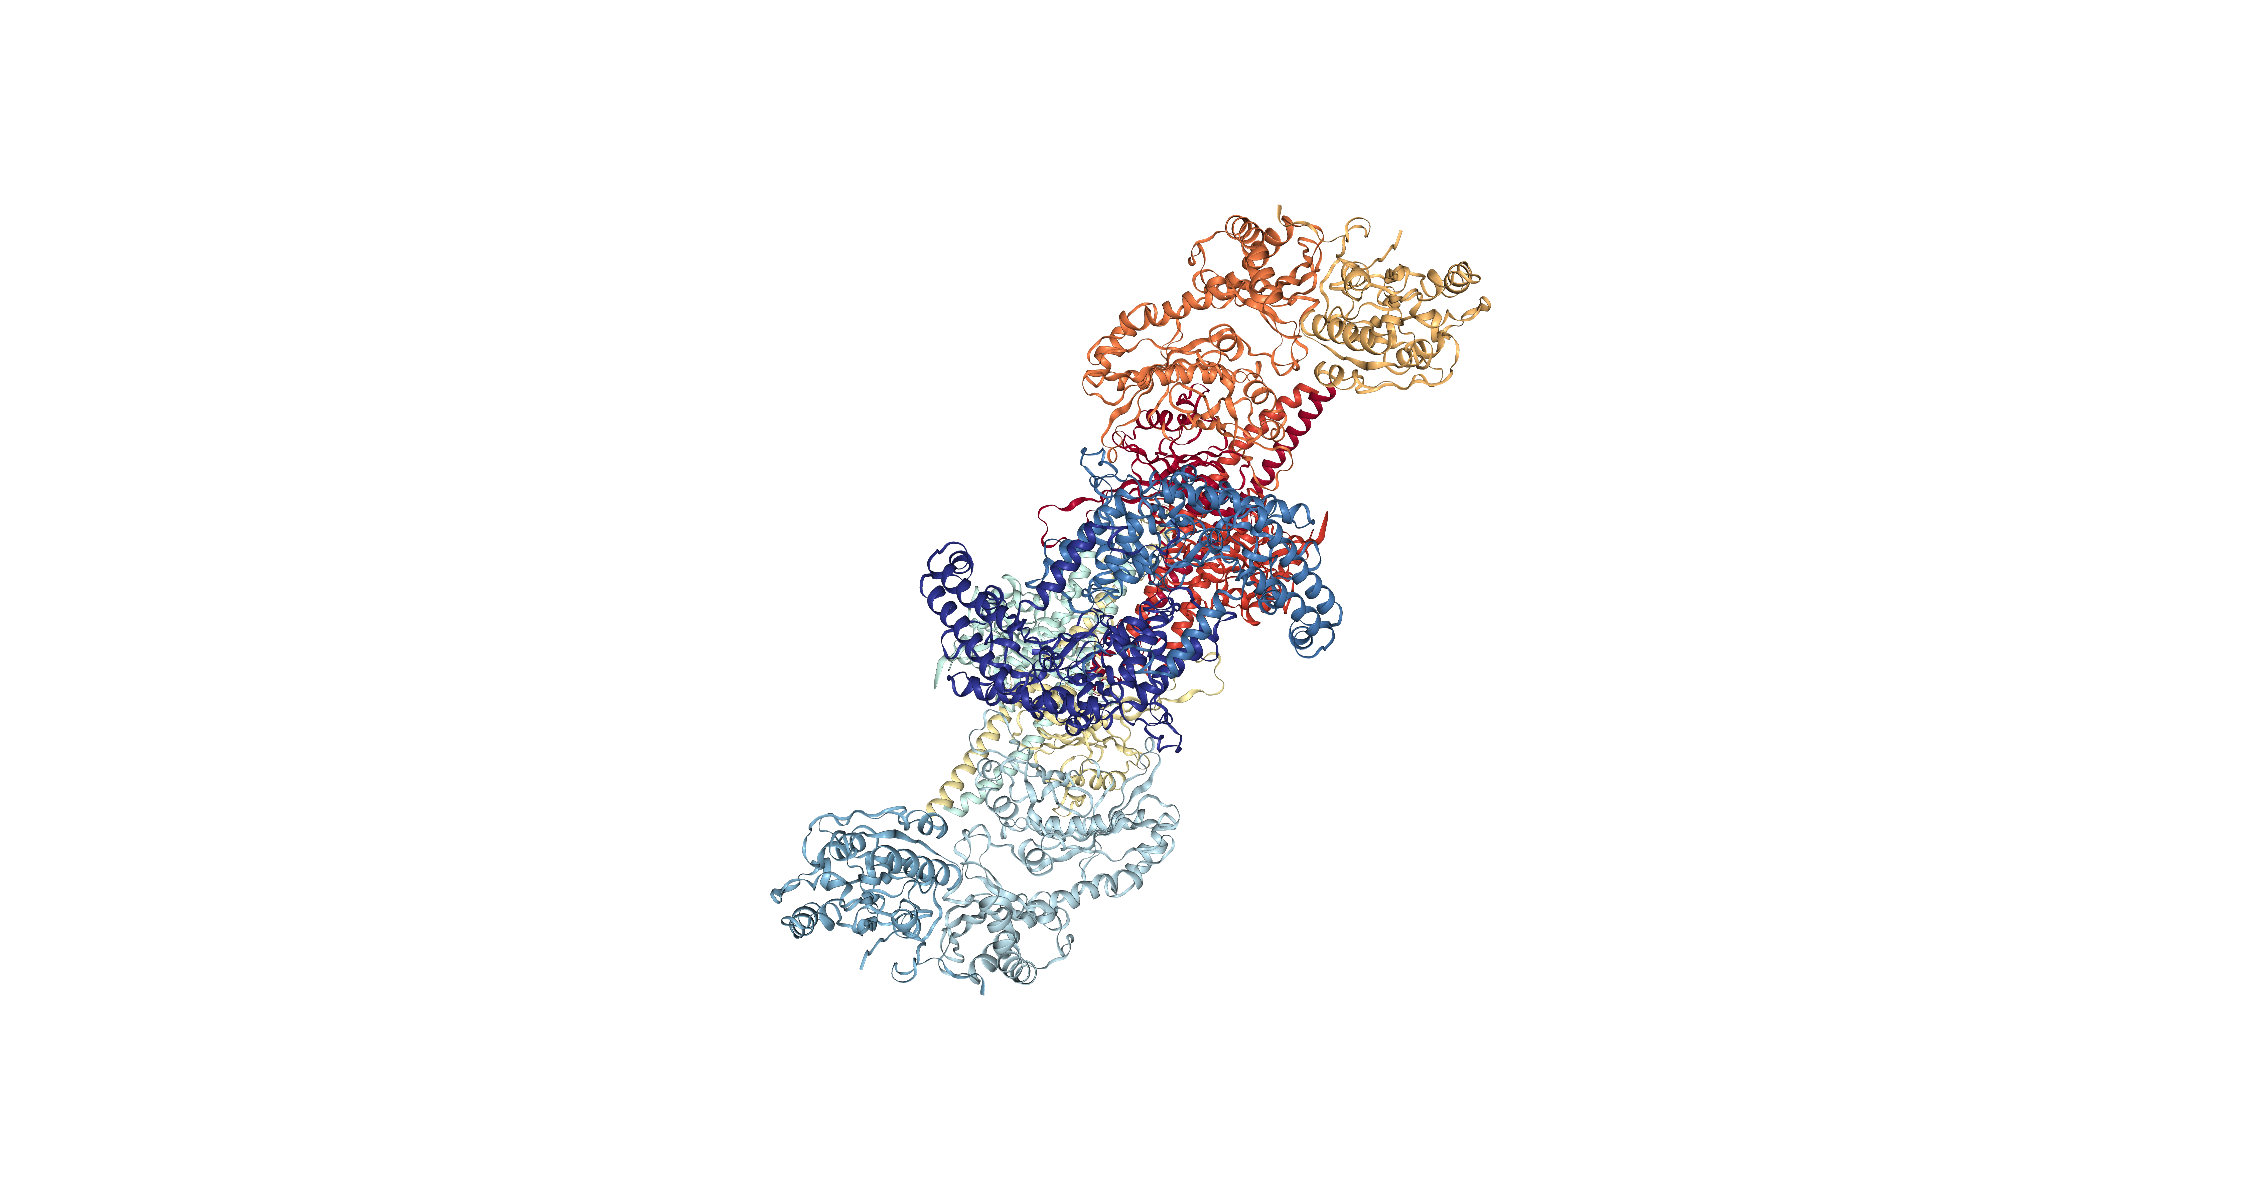

In [25]:
BRCA1_Human._display_image()

## Analysis Method 3A: Sequence logos for the Pairwise Alignment

Sequence logos allow us to see graphical representations of the sequence conservations of a nucleotide sequence. 

In [5]:
#install package 
pip install logomaker

     |████████████████████████████████| 11.8 MB 1.7 MB/s eta 0:00:01   |                                | 30 kB 709 kB/s eta 0:00:17     |▋                               | 245 kB 1.7 MB/s eta 0:00:07     |████▎                           | 1.6 MB 1.7 MB/s eta 0:00:07
Note: you may need to restart the kernel to use updated packages.


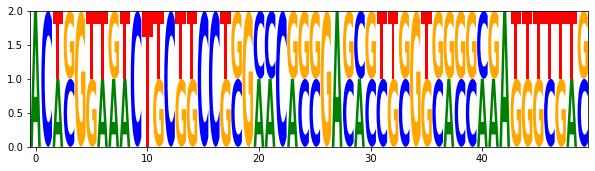

In [27]:
import logomaker as lm

# Make the lengths match
# Assume the human sequence is shorter than the mouse sequence
min_length = len(str(alignments.seqA))
if len(str(alignments.seqA)) > len(str(alignments.seqB)):
    min_length = len(str(alignments.seqB))

# make an array containing seqA and seqB
raw_seqs = []
raw_seqs.append(str(alignments.seqA[0:min_length]))
raw_seqs.append(str(alignments.seqB[0:min_length]))

# iterate over array to align the sequence logos 
counts_mat = lm.alignment_to_matrix(raw_seqs)

# Create Logo
lm.Logo(counts_mat)


## Analysis Method 3B: Distance Measurement for 3D Structure

Distance measurements allow us to see the distance between two molecules in a sequence. 

In [32]:
import numpy
from Bio.PDB.PDBParser import PDBParser

residues = [r for r in structure.get_residues()]  

# Calculate the distance between the alpha carbons for a pair structures
BRCA1_Human  = residues[0]["CA"].get_coord()
BRCA1_Mouse = residues[1]["CA"].get_coord()
print('{} - {} = {}'.format(BRCA1_Human,BRCA1_Mouse, numpy.linalg.norm(BRCA1_Human-BRCA1_Mouse)))


[154.236 177.074 171.723] - [151.224 175.111 172.78 ] = 3.747366428375244


### Analyzing the Results

The first method, pairwise sequencing, shows an alignment score of 1.0 For pairwise sequence alignment, a higher score indicates a better alignment, this means that although the sequences are both BRCA seqeunces, they did not align well. This implies the sequences, although they both encode for tumor supression, are not similar and that because of this, it may be the cause for differences in cancer rates between the two mammals. The sequence logo shown above depicts where the nucleotides match up within the alignment. Wherever there is a large base letter, it depicts where the alignments have a match. The second method, stuctural bioinformatics, compares the two BRCA1 genes between a mouse and a human and the distance measuement between the alpha carbons of the structures. From the measuement, we can see the difference is 3.75. 